# Imports

In [9]:
# Some imports, not really important what they do

import pandas            as pd
import matplotlib.pyplot as plt
import numpy             as np

import matplotlib
import sys

# Import Diego's tools
from paquetes.npz_to_df import truehits_info_to_df
from paquetes.npz_to_df import track_info_to_df

pd.set_option('display.max_rows', 100000)

sys.path.append('/Users/diiego/software/watchmal/DataTools/') # Path to WatChMaL tools (not used here)
sys.path.append('/Users/diiego/software/ROOT/ROOT_6.24/install/lib') # Path to ROOT installation
sys.path.append('/Users/diiego/Library/Mobile Documents/com~apple~CloudDocs/Desktop/DIEGO_cloud/USC/PHD/HK/HK\ SOURCES/code/ambe_source/npz_ana/paquetes') 
# Path to Diego's tools that we use here to extract data from the .npz file. This is needed in order to create the DataFrames (DFs)

In [10]:
# Make the notebook wider

from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [49]:
# Path to the npz file in our machine

npz = '/Users/diiego/software/wcsim_root24/install/ambeEvt_StackingOnly_1000evts.npz'

# Creation of the two DataFrames: trueHits and track_npz

In [50]:
npz_DRQE = npz

# Creation of the hits DataFrame using the function truehits_info_to_df from Diego's tools
df_trueHits_npz_DRQE = truehits_info_to_df(npz_DRQE)

# Adding some two new variables: hit_r and hit_start_r (final and initial 3-dimensional position in the simulation world of the hits, respectively)
x = np.float64(df_trueHits_npz_DRQE['hit_x'].values)
y = np.float64(df_trueHits_npz_DRQE['hit_z'].values)
z = np.float64(df_trueHits_npz_DRQE['hit_y'].values)

x_start = np.float64(df_trueHits_npz_DRQE['hit_start_x'].values)
y_start = np.float64(df_trueHits_npz_DRQE['hit_start_z'].values)
z_start = np.float64(df_trueHits_npz_DRQE['hit_start_y'].values)


df_trueHits_npz_DRQE['hit_r']       = np.sqrt(x**2+y**2+z**2)
df_trueHits_npz_DRQE['hit_start_r'] = np.sqrt(x_start**2+y_start**2+z_start**2)

In [54]:
# Creation of the tracks DataFrame using the function track_info_to_df from Diego's tools
df_track_npz = track_info_to_df(npz_DRQE)

# Adding the same two variables as before to this DF too.
x = np.float64(df_track_npz['track_xf'].values)
y = np.float64(df_track_npz['track_zf'].values)
z = np.float64(df_track_npz['track_yf'].values)

x_start = np.float64(df_track_npz['track_xi'].values)
y_start = np.float64(df_track_npz['track_zi'].values)
z_start = np.float64(df_track_npz['track_yi'].values)


df_track_npz['track_rf']  = np.sqrt(x**2+y**2+z**2)
df_track_npz['track_ri']  = np.sqrt(x_start**2+y_start**2+z_start**2)

# Print the limit of the BGO so you can know if the track began or ended inside/outside the BGO
print("BGO frontier is at {:.2f}".format(np.sqrt(2.5**2 + 2.5**2 + 2.5**2)))

BGO frontier is at 4.33


In [55]:
# Print the first DF (please note this is just first event and we are removing the DarkRate hits, also sorting by hit parent trackID)
df_trueHits_npz_DRQE[(df_trueHits_npz_DRQE['event_id'] == 0) & (df_trueHits_npz_DRQE['true_hit_parent'] != -1)].sort_values('true_hit_parent')

,event_id,true_hit_parent,true_hit_pmt,true_hit_time,true_hit_start_time,hit_x,hit_y,hit_z,hit_start_x,hit_start_y,hit_start_z,hit_r,hit_start_r
0,0,2,1739,13.513537,2.162437,-58.023235,128.526764,74.689987,1.647057,2.122226,-1.824801,159.575747,3.247543
0,0,10,857,77.112854,68.54248,71.982117,-86.338646,-145.929489,0.46262,1.322304,-1.451593,184.204242,2.017332
0,0,10,1,375.102783,367.534821,160.500107,18.279978,2.238289,0.464955,1.32149,-1.451992,161.553248,2.017622
0,0,10,1536,239.266449,230.711166,-82.479965,80.970734,-146.673187,0.462945,1.322204,-1.451966,186.741073,2.017609
0,0,10,1181,516.643005,509.692871,61.916832,-126.817345,-47.087044,0.463012,1.322231,-1.45201,148.773394,2.017674
0,0,10,1992,376.662994,368.781769,114.098976,130.6017,-19.051533,0.465029,1.322619,-1.451868,174.465874,2.018289
0,0,10,1559,38.607788,30.661692,63.963219,71.090828,-147.590652,0.46507,1.322386,-1.451932,175.864152,2.018193
0,0,10,394,22.176132,14.201758,8.437256,-8.724318,167.060608,0.465071,1.322393,-1.451932,167.500889,2.018197
0,0,10,1894,487.854675,481.253601,41.604473,129.603073,-54.85146,0.463651,1.322454,-1.450953,146.753437,2.017206
0,0,10,1581,339.131683,330.854797,113.230042,89.129753,-113.090225,0.465056,1.322277,-1.451939,183.179022,2.018124


In [56]:
# Print the second DF (please note this is just first event and we are removing the two first tracks since they are not physical,
# also sorting by trackID)
df_track_npz[(df_track_npz['event_id'] == 0)][2:].sort_values('track_id').head(100)

,event_id,xi,yi,zi,dxi,dyi,dzi,track_pid,track_id,track_parent,track_creator_process,track_ti,track_energy,track_xi,track_yi,track_zi,track_xf,track_yf,track_zf,track_rf,track_ri
0,0,0.0,0.0,0.0,-0.059611,-0.935818,0.347405,2112,1,0,,0.0,943.149231,0.0,0.0,0.0,-4.569898,-18.030174,-7.53404,20.068207,0.000000
0,0,0.0,0.0,0.0,-0.059611,-0.935818,0.347405,22,2,0,,0.0,4.4,0.0,0.0,0.0,1.648947,2.126667,-1.828987,3.253757,0.000000
0,0,0.0,0.0,0.0,-0.059611,-0.935818,0.347405,2212,3,1,hadElastic,3.206228,939.745605,-0.088834,-7.793709,2.947787,-0.085331,-7.795635,2.95,8.335569,8.333021
0,0,0.0,0.0,0.0,-0.059611,-0.935818,0.347405,2212,4,1,hadElastic,3.883627,938.497803,-0.743098,-8.981304,2.950137,-0.742953,-8.981539,2.949831,9.482696,9.482580
0,0,0.0,0.0,0.0,-0.059611,-0.935818,0.347405,2212,5,1,hadElastic,4.899226,938.846985,-2.074653,-10.301142,3.14407,-2.0748,-10.301698,3.144878,10.969049,10.968267
0,0,0.0,0.0,0.0,-0.059611,-0.935818,0.347405,2212,6,1,hadElastic,5.189948,938.909058,-2.414836,-10.506063,2.94215,-2.415995,-10.505906,2.942066,11.174384,11.174302
0,0,0.0,0.0,0.0,-0.059611,-0.935818,0.347405,2212,7,1,hadElastic,9.07294,938.631775,-3.496632,-12.901424,1.746304,-3.497142,-12.901444,1.746314,13.480611,13.480459
0,0,0.0,0.0,0.0,-0.059611,-0.935818,0.347405,22,8,1,nCapture,201238.3125,2.223055,-4.569898,-18.030174,-7.53404,-9.265575,-23.948879,34.494217,43.002915,20.068207
0,0,0.0,0.0,0.0,-0.059611,-0.935818,0.347405,1000010020,9,1,nCapture,201238.3125,1875.614258,-4.569898,-18.030174,-7.53404,-4.569902,-18.03017,-7.534045,20.068206,20.068207
0,0,0.0,0.0,0.0,-0.059611,-0.935818,0.347405,11,10,2,compt,0.067244,0.986903,0.464611,1.318818,-1.452171,0.463069,1.322254,-1.452047,2.017729,2.015923


# Checks

## Neutron Energy Spectrum
Here we plot the neutron energy spectrum alongside the gamma energies. We know that the source can decay to three different levels, producing 3 different energy configurations for the neutron-gamma pair. 
The lines represent the theoretical energy of the neutron depending on what configuration is being produced whereas the histogram are the simulated data.

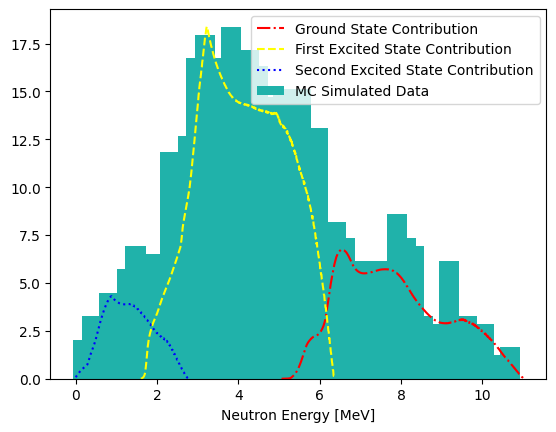

In [60]:
df = pd.read_csv("./copy_alnspectra_A.dat", sep=" ")

energy = (df_track_npz[df_track_npz['track_id'] == 1]['track_energy'] - 939.56542052)
#counts, bins, patches = plt.hist(energy, bins=50);
#print(np.max(energy))
#print(np.min(energy))
#print('Mean: {:.2f} MeV'.format(np.mean(energy)))
#
#plt.plot(df['Energy'], df['CountsQ0']);
#plt.plot(df['Energy'], df['CountsQ1']);
#plt.plot(df['Energy'], df['CountsQ2']);
#plt.xlabel('Neutron Energy [MeV]');

counts, bins = np.histogram(energy, 50)

counts
normalized_counts = counts / np.max(counts) * np.max(df['CountsSum'].to_numpy())

valuesQ0 = df['CountsQ0'].to_numpy()
valuesQ0[valuesQ0==0] = np.nan
valuesQ1 = df['CountsQ1'].to_numpy()
valuesQ1[valuesQ1==0] = np.nan
valuesQ2 = df['CountsQ2'].to_numpy()
valuesQ2[valuesQ2==0] = np.nan

plt.bar(bins[0:-1], normalized_counts, width=0.5, color='lightseagreen', label='MC Simulated Data');
plt.plot(df['Energy'], valuesQ0, linestyle='-.', color='red', label='Ground State Contribution');
plt.plot(df['Energy'], valuesQ1, linestyle='--', color='yellow', label='First Excited State Contribution');
plt.plot(df['Energy'], valuesQ2, linestyle=':', color='blue', label='Second Excited State Contribution');

plt.xlabel('Neutron Energy [MeV]');

plt.legend();

## Compute Area Under Curve for each state
This basically gives the probability for each configuration to happen (in theory) computing the probability as the area under the curve.

In [10]:
from scipy.integrate import trapz

df = pd.read_csv("./copy_alnspectra_A.dat", sep=" ")

valuesQ0 = df['CountsQ0'].to_numpy()
valuesQ1 = df['CountsQ1'].to_numpy()
valuesQ2 = df['CountsQ2'].to_numpy()

H0 = trapz(valuesQ0, df['Energy'])
H1 = trapz(valuesQ1, df['Energy'])
H2 = trapz(valuesQ2, df['Energy'])

noGammaProb    = H0/(H0+H1+H2)
FirstGammaProb = H1/(H0+H1+H2)
OtherGammaProb = H2/(H0+H1+H2)

print('noGammProb = {:.5f}%'.format(noGammaProb))
print('FirstGammProb = {:.5f}%'.format(FirstGammaProb))
print("OtherGammProb = {:.5f}% (or just second excited state, don't know right now)".format(OtherGammaProb))
print("Sum is actually 100")

noGammProb = 0.26119%
FirstGammProb = 0.65082%
OtherGammProb = 0.08799% (or just second excited state, don't know right now)
Sum is actually 100


## Gamma Energy Spectrum
Check that the gamma energy spectrum is acually quantized and can only take values 0, 4.4 and 7.7 MeV.

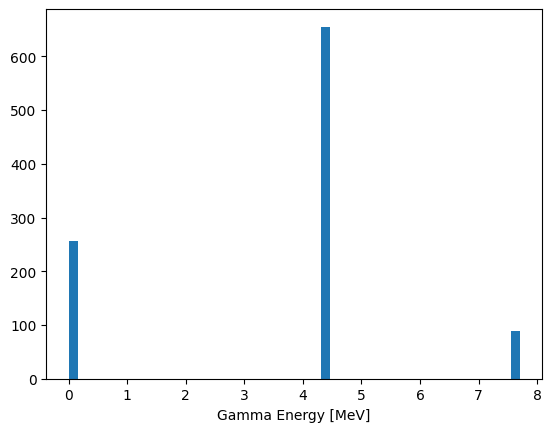

In [11]:
energy = (df_track_npz[df_track_npz['track_id'] == 2]['track_energy'])

plt.hist(energy, bins=50);
plt.xlabel('Gamma Energy [MeV]');

# Neutron Capture Characteristic Time
### Computed as the initial track time for the Deuteron

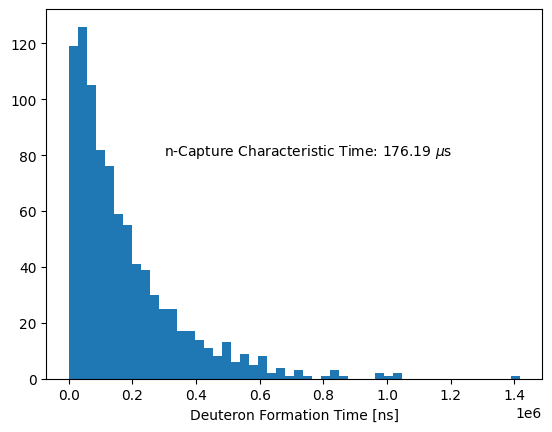

In [61]:
plt.figure();
plt.hist(df_track_npz[df_track_npz['track_pid'] == 1000010020]['track_ti'], bins=50);
plt.xlabel('Deuteron Formation Time [ns]');

plt.text(0.3e6, 80, 'n-Capture Characteristic Time: {:.2f} $\mu$s'.format(np.mean(df_track_npz[df_track_npz['track_pid'] == 1000010020]['track_ti'])*1e-3));

# Cool TrueHits Plots

<IPython.core.display.Javascript object>


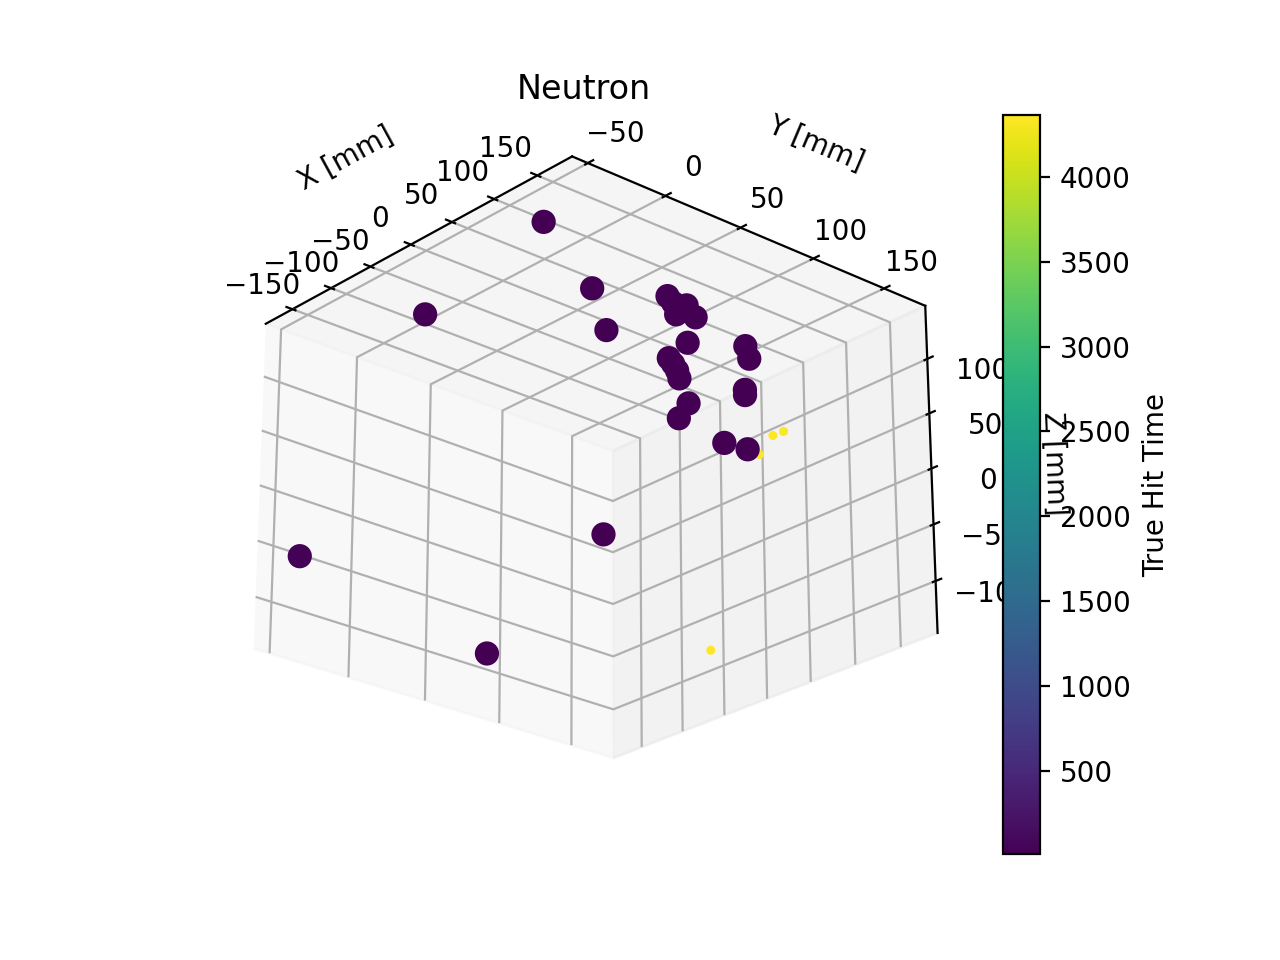

In [9]:
from paquetes.plotting import plot3d
%matplotlib notebook

plot3d(df_trueHits_npz_DRQE, event=0, title='Neutron', colormap="viridis", mode='time', alpha=1)